In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from netCDF4 import Dataset
import cartopy.feature as cfe
from metpy.units import units


import matplotlib.colors as mcolors
from metpy.units import masked_array, units


In [42]:
# d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc").sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc").sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))

d2.coords['longitude'] = d2.coords['longitude'] - 180
#d.coords
d2 = d2.sel(longitude=-55.75, latitude=-30.75)
#-30.847°S -55.736
d2['tp'].sum(axis=0)

<xarray.DataArray 'tp' ()>
array(-9.126961e-08, dtype=float32)
Coordinates:
    longitude  float32 -55.75
    latitude   float32 -30.75

/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


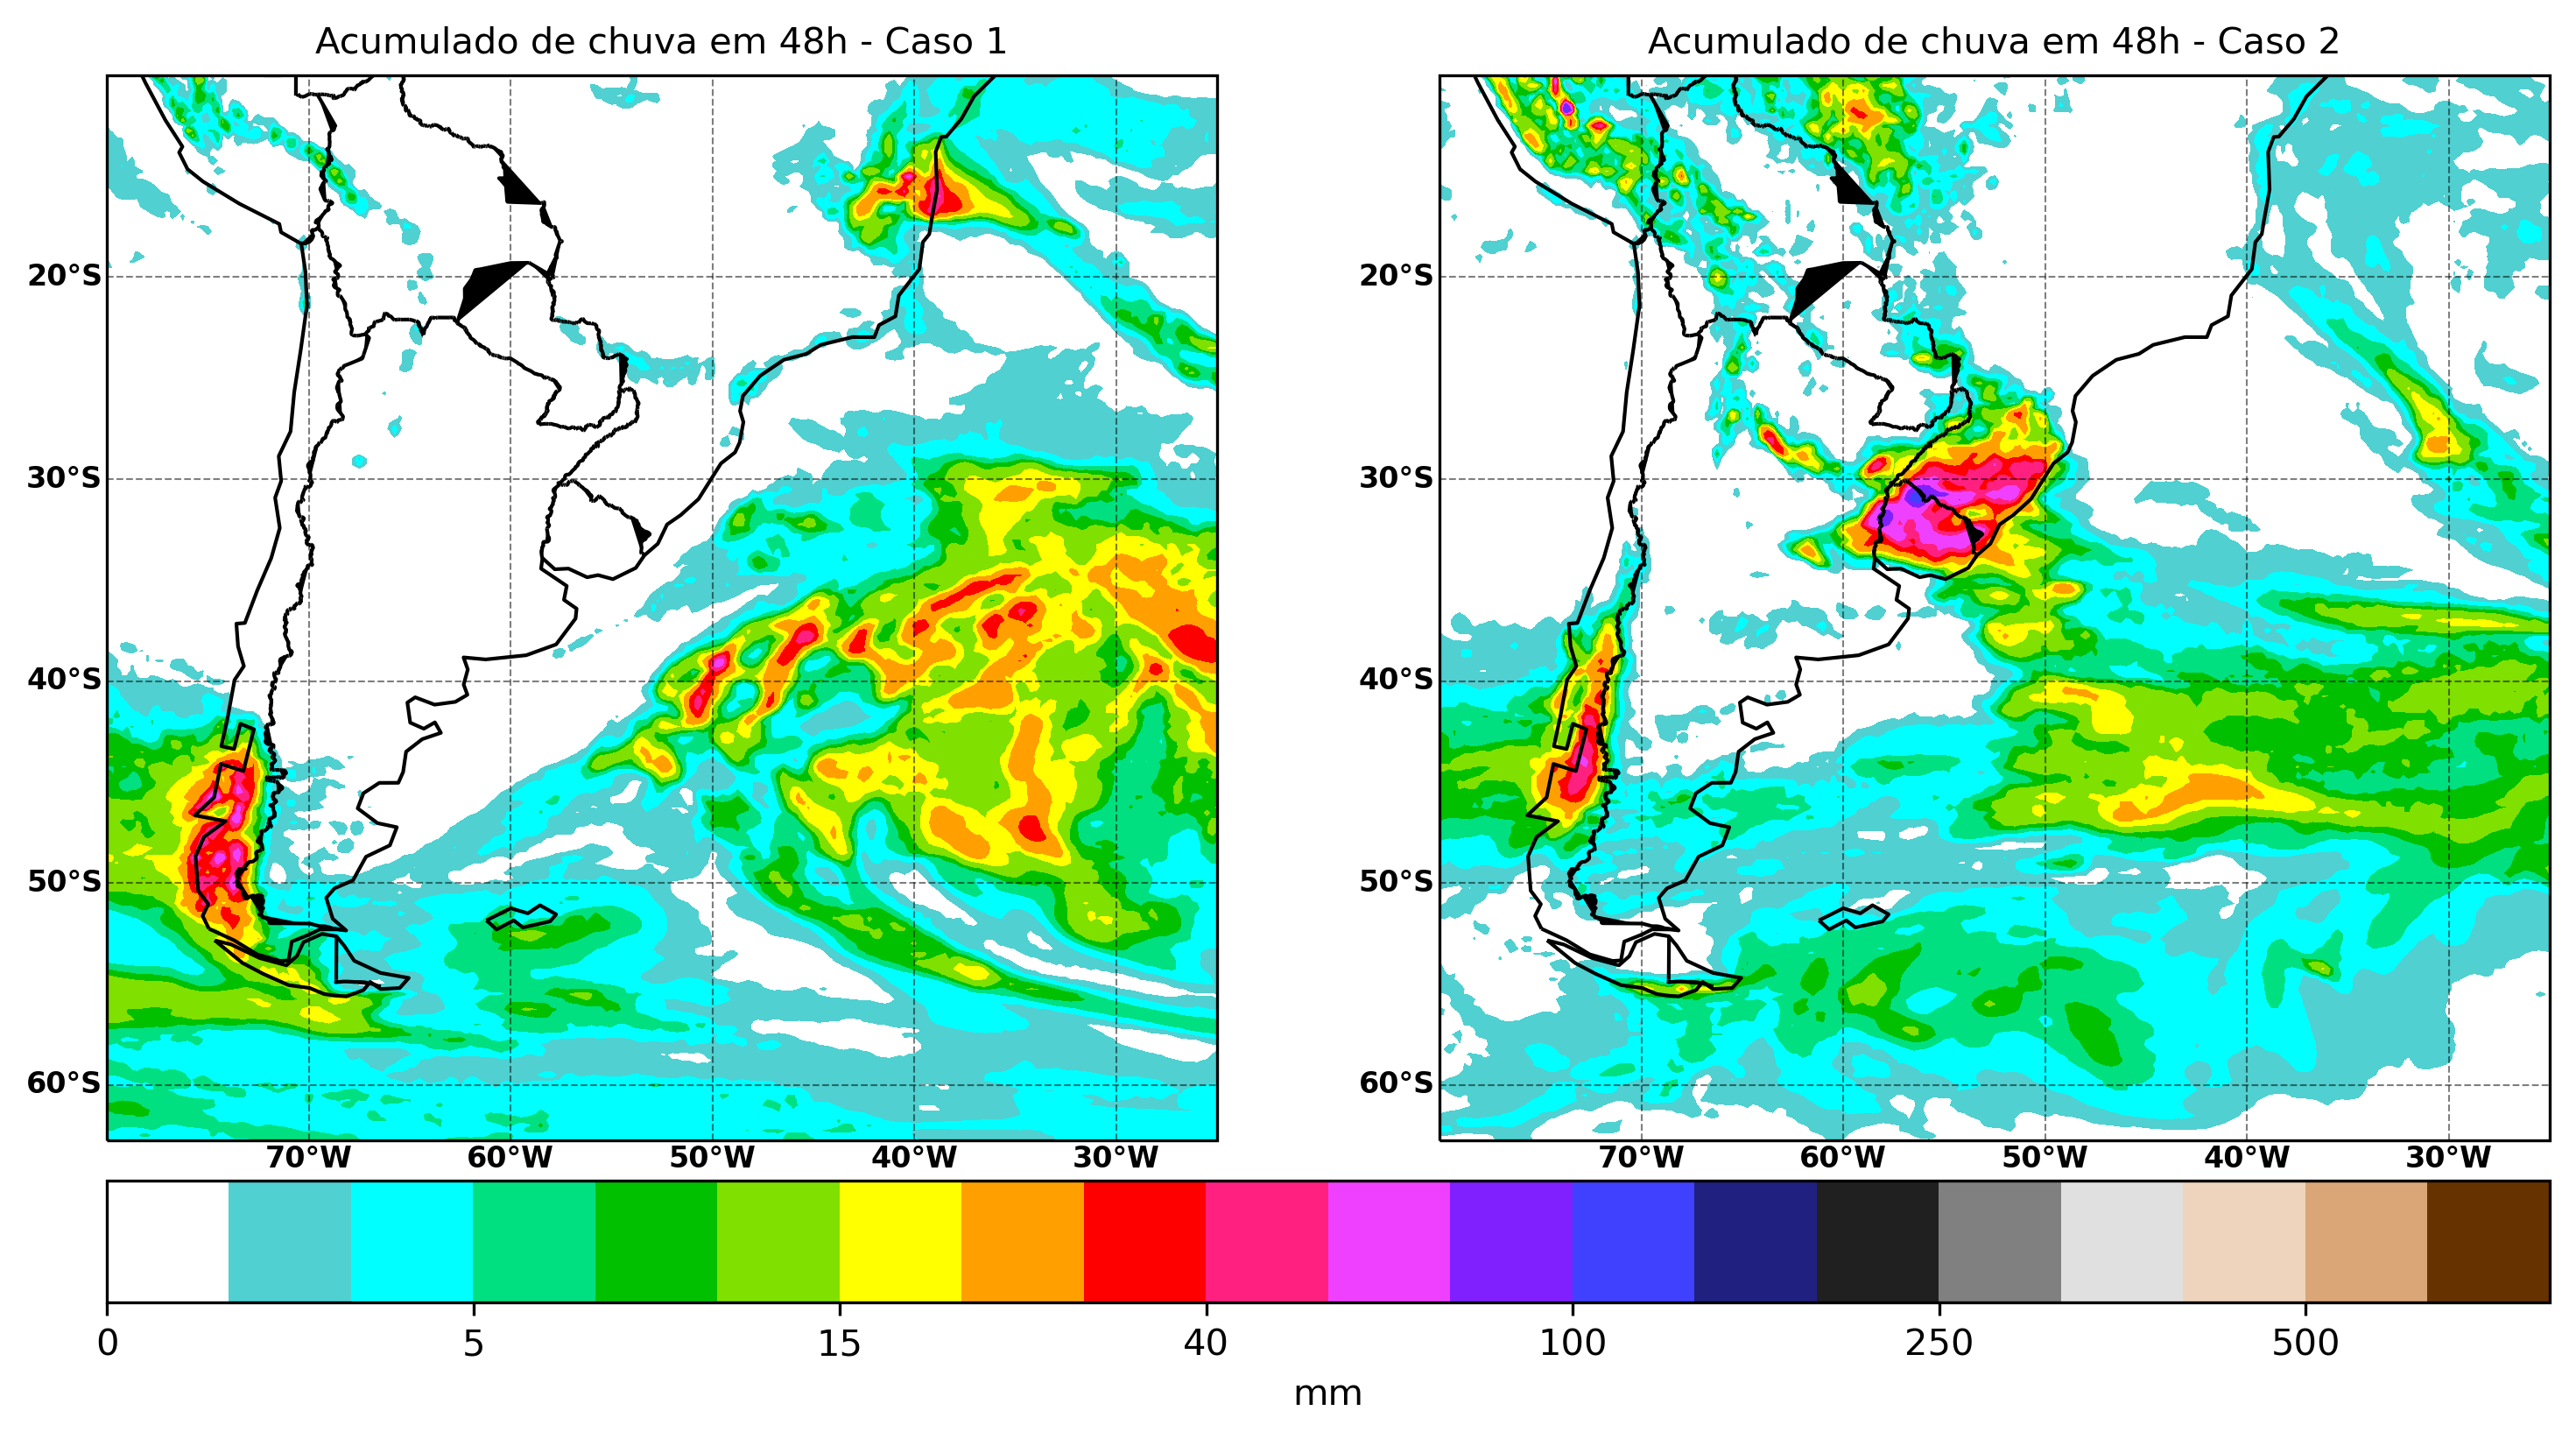

In [183]:
d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc").sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc").sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))

rain=d['tp'].sum(axis=0)
rain=rain*1000

rain2=d2['tp'].sum(axis=0)
rain2=rain2*1000

lon = d['longitude']
lat = d['latitude']
time = d['time']

j=0
resolution = '10m'
fig = plt.figure(figsize=(12, 10), dpi=300)

ax= plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                        name='admin_0_boundary_lines_land', 
                        color='black' ,edgecolor='face',
                        facecolor=cfe.COLORS['land'])
ax.add_feature(feature)
ax.set_extent([-80,-25,-10,-60])
cs = ax.contourf(lon,lat,rain,  clevs, cmap=cmap, norm=norm)

ax2= plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                        name='admin_0_boundary_lines_land', 
                        color='black' ,edgecolor='face',
                        facecolor=cfe.COLORS['land'])
ax2.add_feature(feature)
ax2.set_extent([-80,-25,-10,-60])
cs2 = ax2.contourf(lon,lat,rain2,  clevs, cmap=cmap, norm=norm)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlabels_top = False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
ax.set_title('Acumulado de chuva em 48h - Caso 1', fontsize=10)

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
gl2.ylabels_left = True
gl2.ylabels_right = False
gl2.xlabels_top = False
gl2.xlines = True
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.ylabel_style = {'size': 10, 'color': 'black'}
gl2.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
gl2.xlabel_style = {'size': 10, 'color': 'gray'}
gl2.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
ax2.set_title('Acumulado de chuva em 48h - Caso 2', fontsize=10)

# plt.colorbar(cs)
fig.colorbar(cs, ax=[ax,ax2], orientation='horizontal', label='mm', pad=0.02)
plt.show()

/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


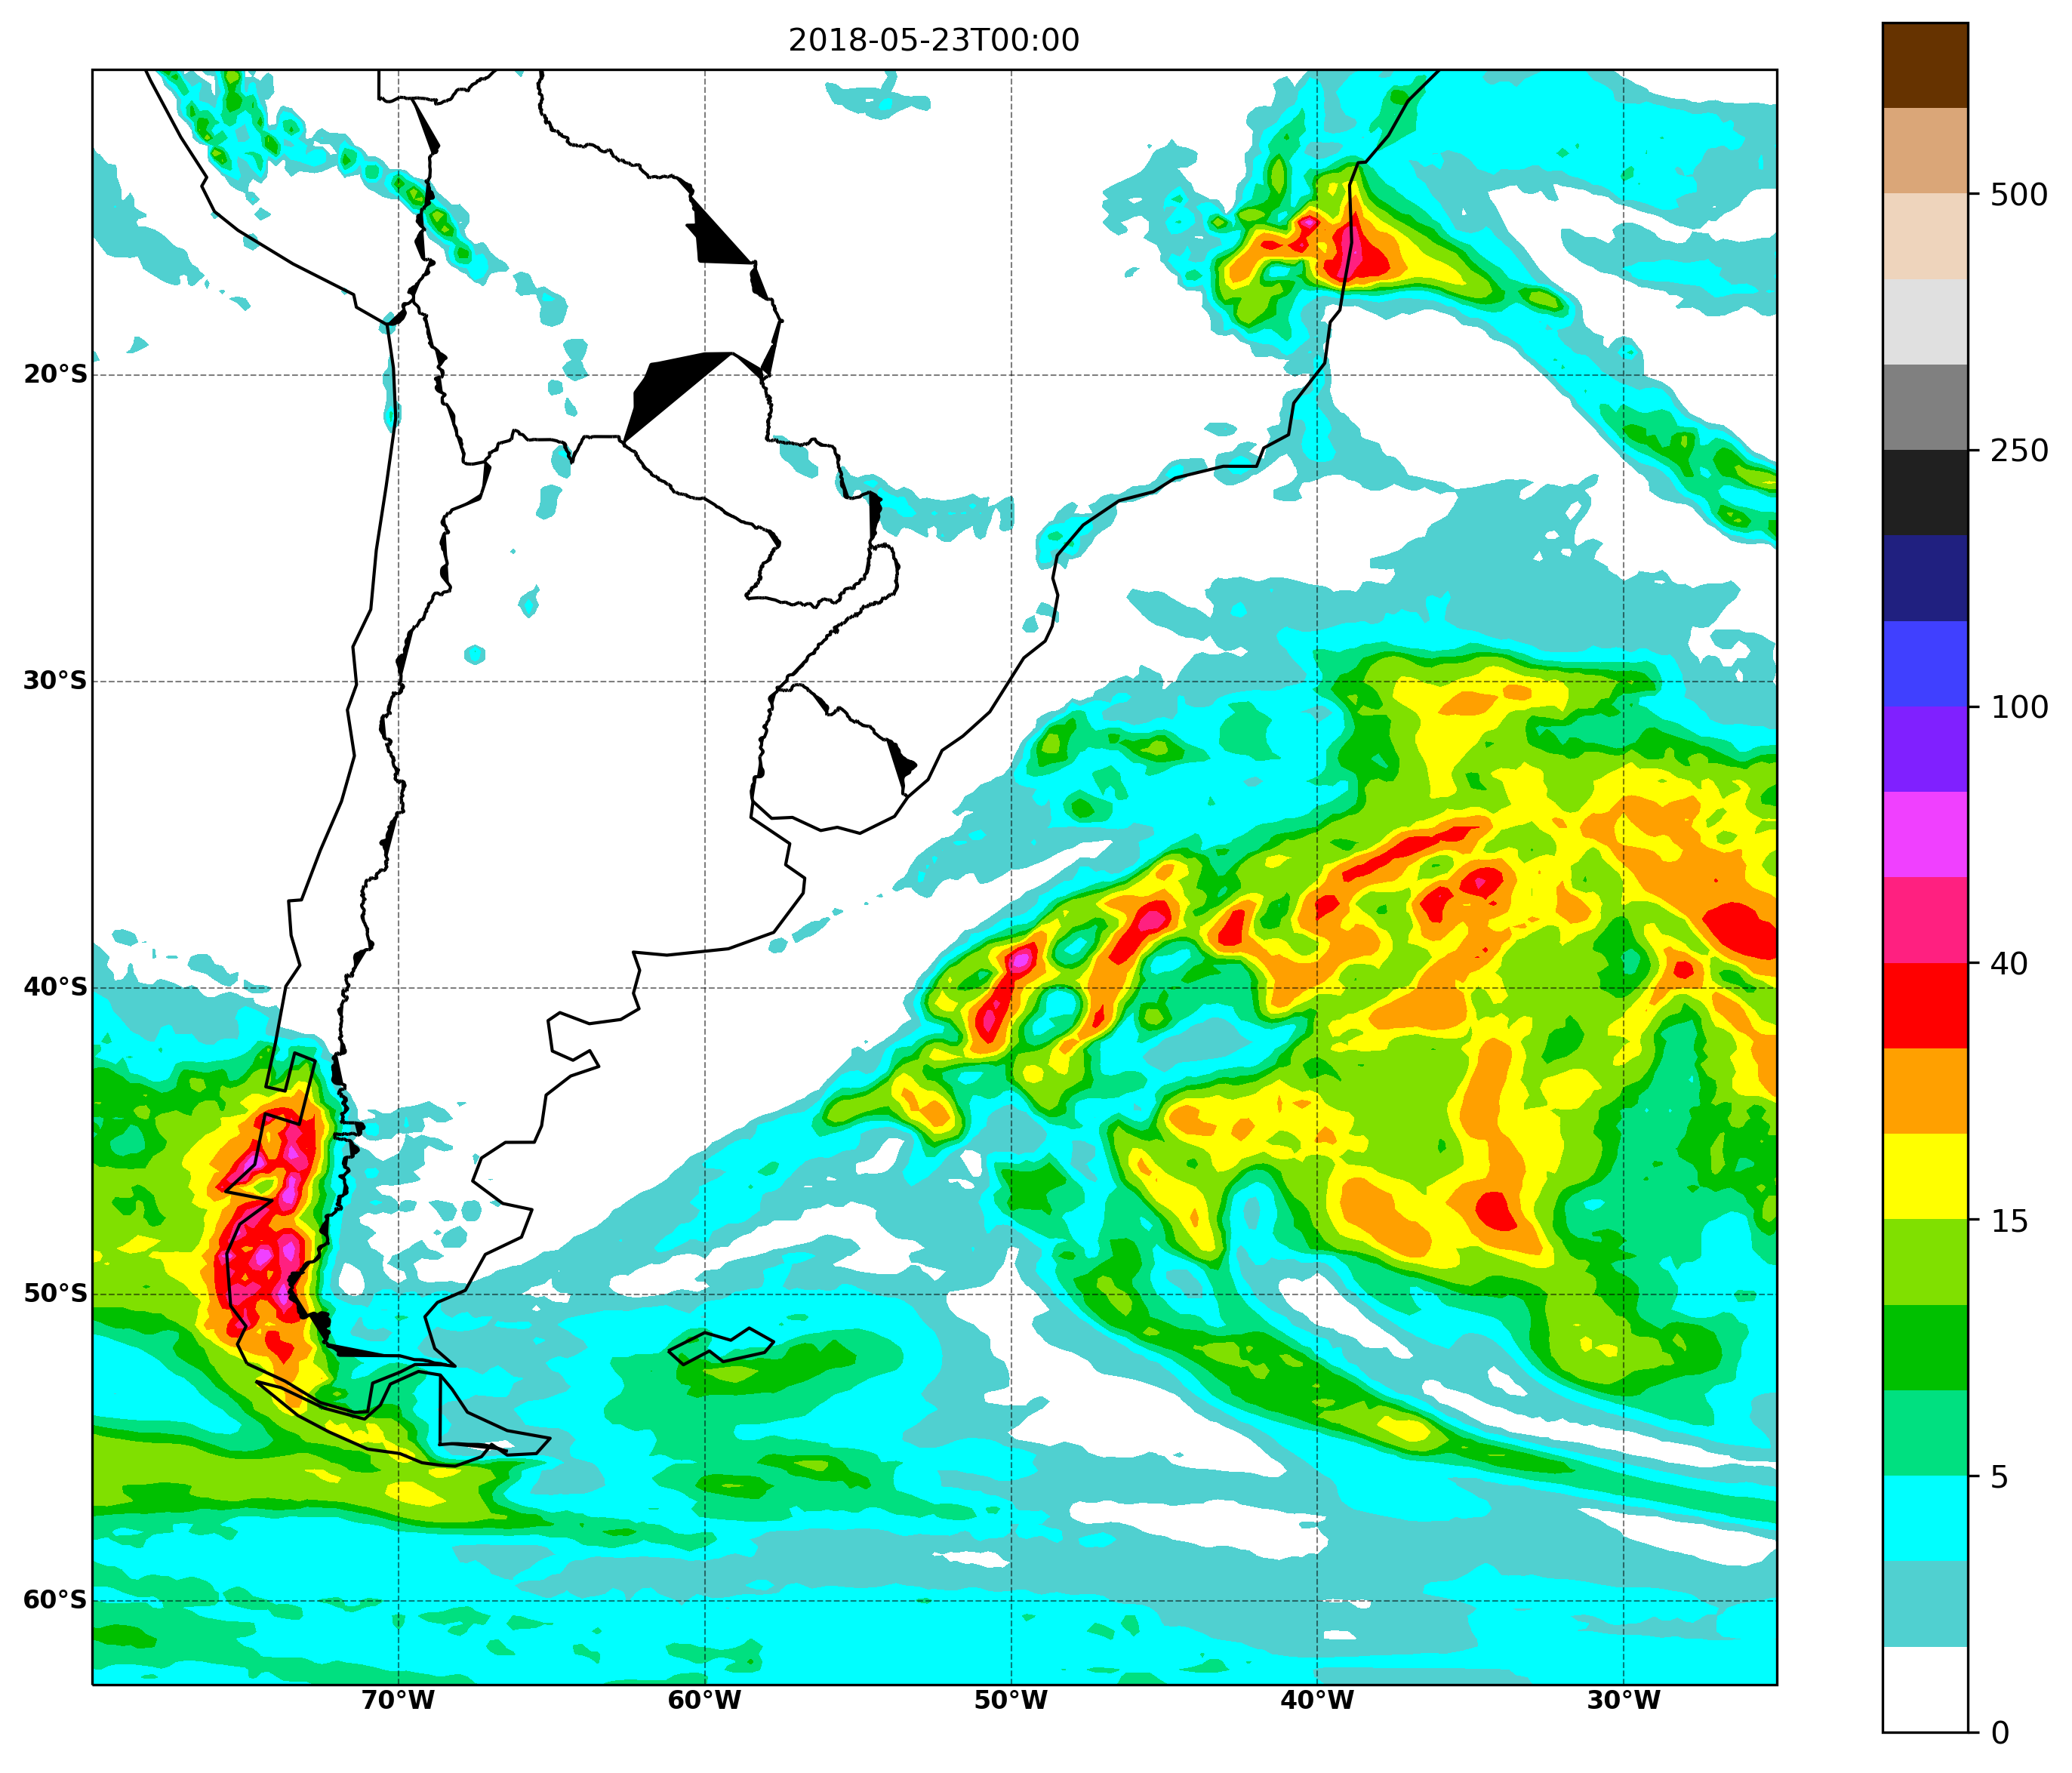

In [175]:
d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc").sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
rain=d['tp'].sum(axis=0)
rain=rain*1000
lon = d['longitude']
lat = d['latitude']
time = d['time']

j=0
resolution = '10m'
fig = plt.figure(figsize=(12, 10), dpi=300)

clevel=np.linspace(-0.50,1000,10)
ax= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                        name='admin_0_boundary_lines_land', 
                        color='black' ,edgecolor='face',
                        facecolor=cfe.COLORS['land'])
ax.add_feature(feature)
ax.set_extent([-80,-25,-10,-60])
# cb = ax.contourf(lon,lat,rain, cmap=get_cmap('jet'), alpha=0.8)

clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

cs = ax.contourf(lon,lat,rain,  clevs, cmap=cmap, norm=norm)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlabels_top = False

gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
ax.set_title('{}'.format(str(d['time'][j].values)[:16]), fontsize=10)

plt.colorbar(cs)
plt.show()

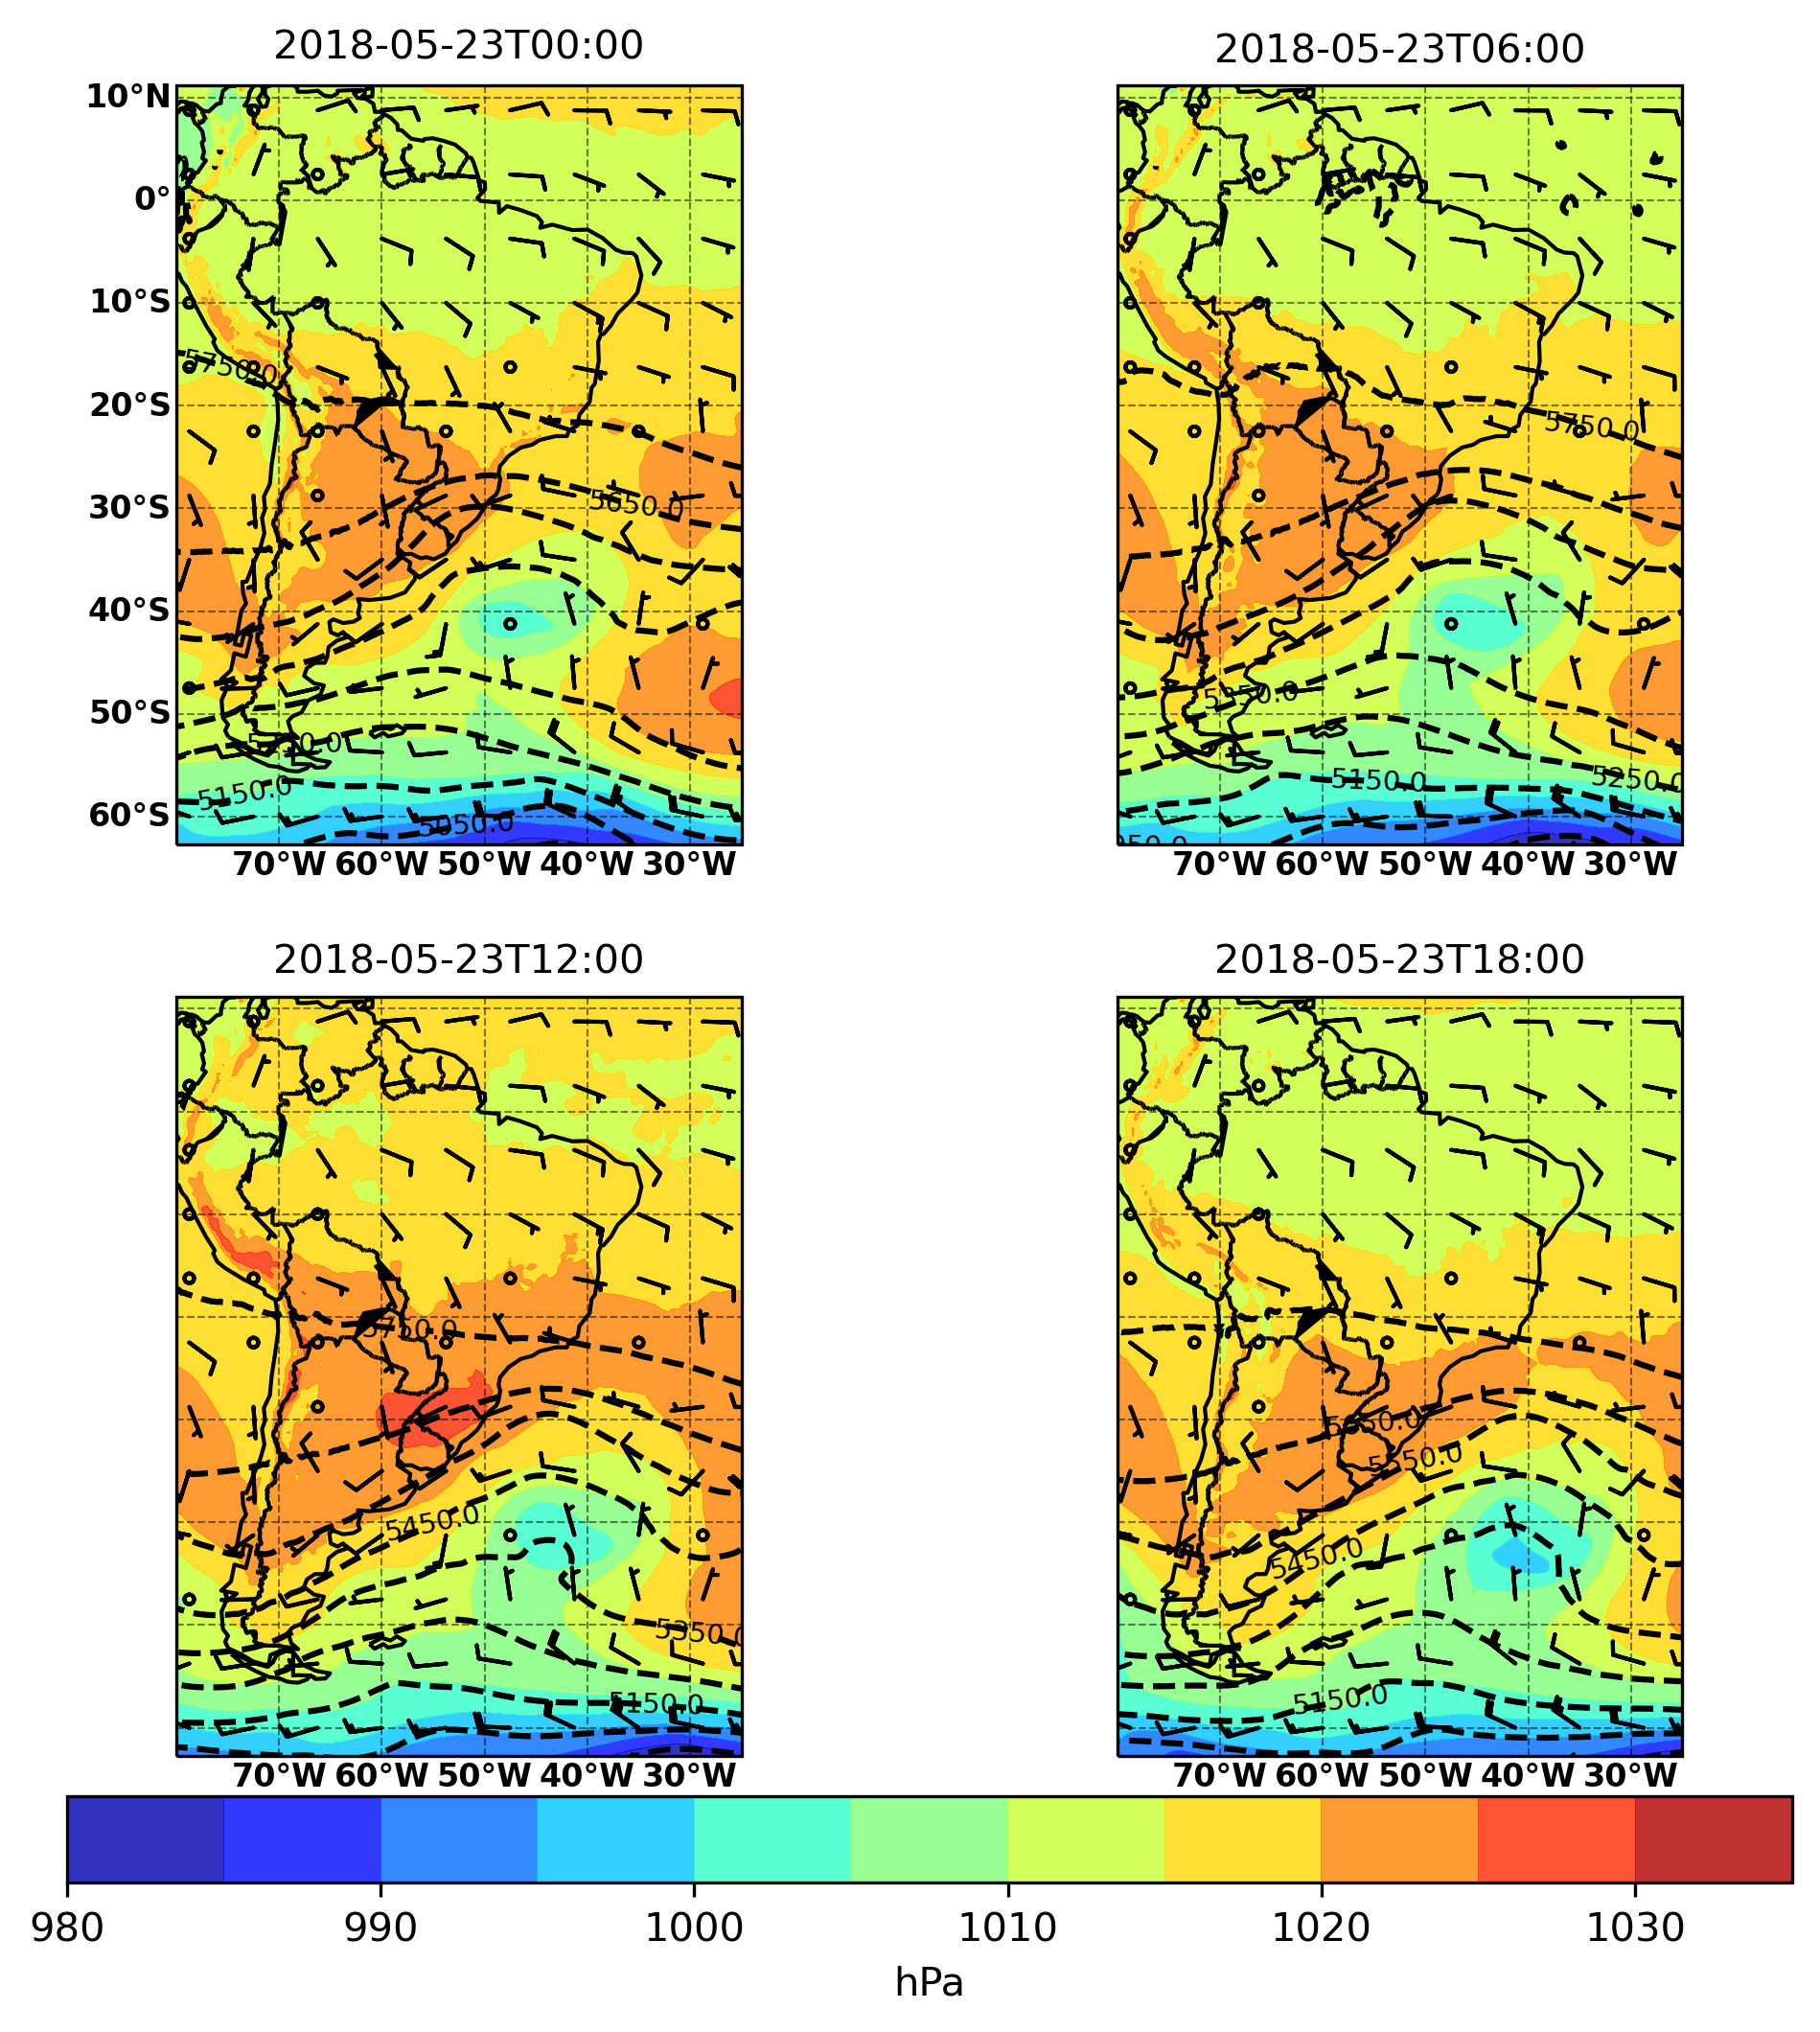

In [90]:
# CASO 1 - 1° DIA
i=0
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc")
d2 = d2.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
msl = d2['msl']
msl = msl * 10**(-2)

d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/pressure_levels.nc")
d = d.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
u=d['u'].sel(level=850)
v=d['v'].sel(level=850)

z = d['z'].sel(level=500) / 10
lon = d['longitude']
lat = d['latitude']
time = d['time']

n_plots = 4
j=0
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels_z = list(range(4650,5950,100))
levels_p = list(range(980,1040,5))

for i in range(1,n_plots+1):
    
    ax= plt.subplot(2, 2, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-80,-25,10,-60])
    cb = ax.contourf(lon,lat,msl[j,:,:], levels_p, cmap=get_cmap('jet'), alpha=0.8)
    cb2 = ax.contour(lon,lat,z[j,:,:], levels_z, colors='black',linestyles='--')
    lons,lats=np.meshgrid(lon,lat)
    ax.barbs(lons[::25,::25], lats[::25,::25], u.values[0,::25,::25], v.values[0,::25,::25], length=4,
                      transform=ccrs.PlateCarree(),
                      color='black', zorder=9)
    #barbs = ax.quiver(lons[::10,::10], lats[::10,::10], u.values[0,::10,::10], v.values[0,::10,::10]) #Plot every 50th 10m wind point in m/s

    plt.clabel(cb2,fmt='%1.1f', fontsize=7)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]), fontsize=10)
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.3, top=1.2, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='hPa', pad=0.02)
plt.savefig('msl_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [44]:
i,j

(4, 24)

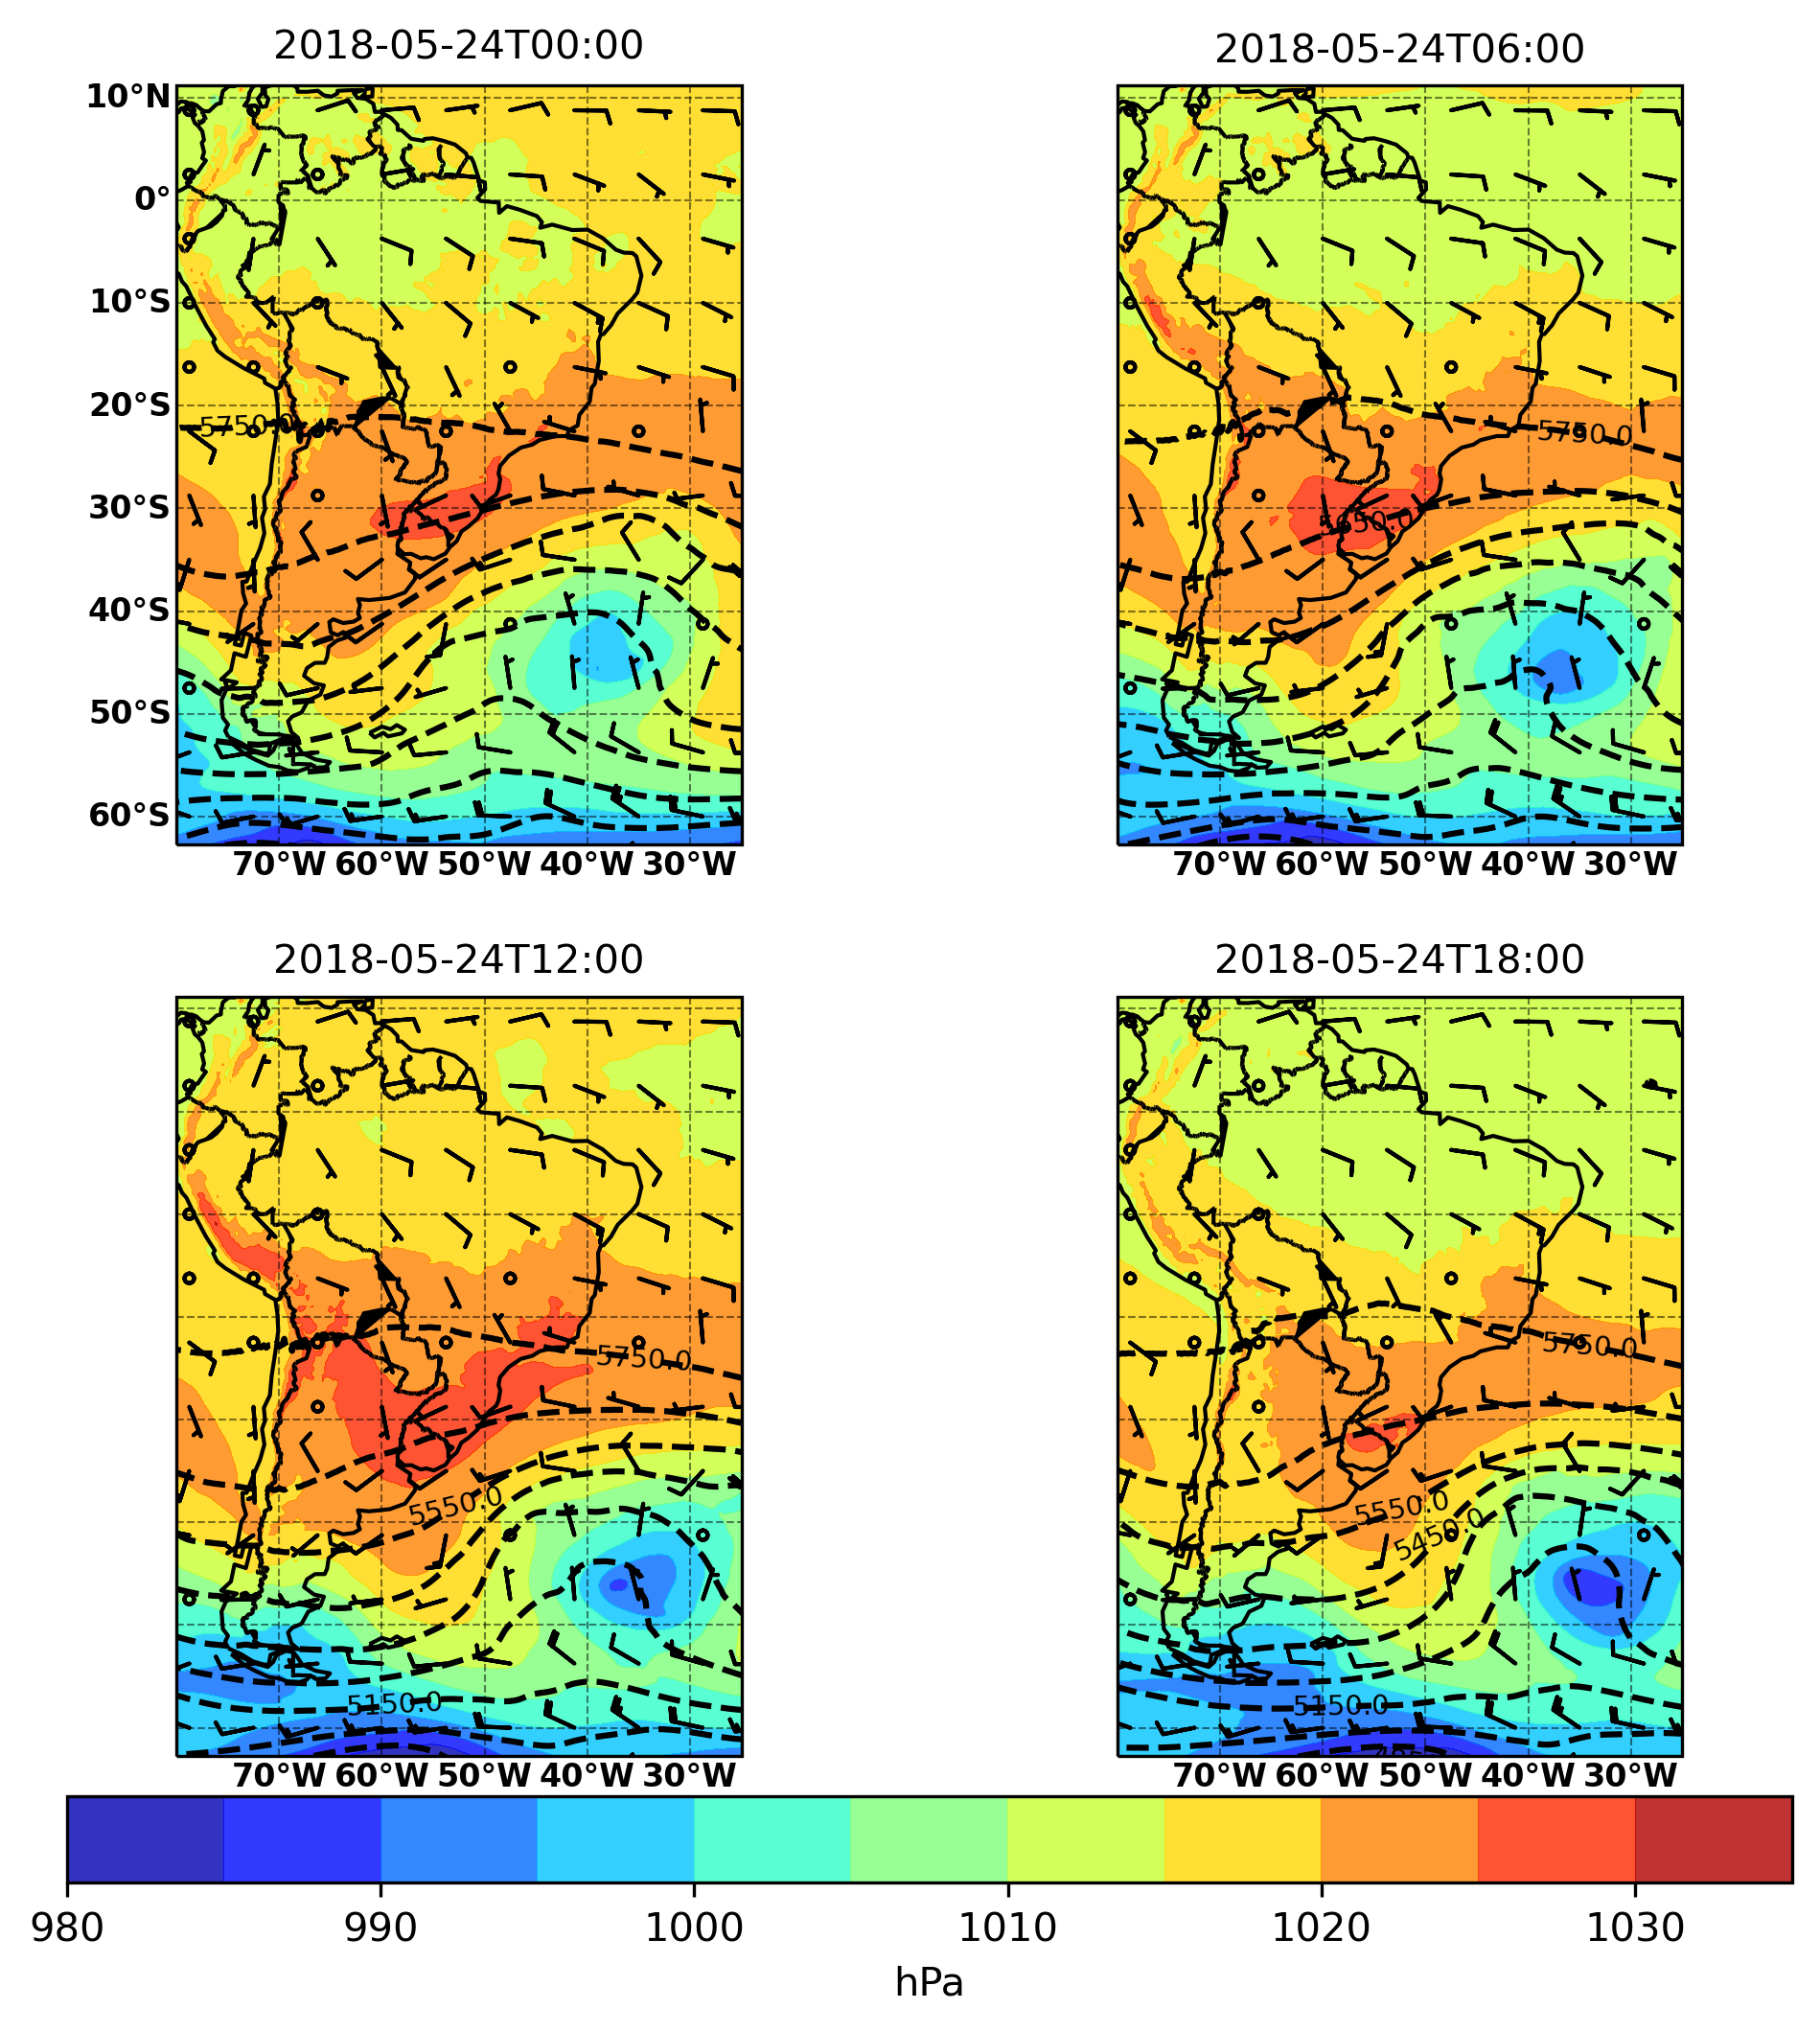

In [92]:
# CASO 1 - 2° DIA
i=5
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc")
d2 = d2.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
msl = d2['msl']
msl = msl * 10**(-2)

d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/pressure_levels.nc")
d = d.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
u=d['u'].sel(level=850)
v=d['v'].sel(level=850)

z = d['z'].sel(level=500) / 10
lon = d['longitude']
lat = d['latitude']
time = d['time']

n_plots = 4
j=24
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels_z = list(range(4650,5950,100))
levels_p = list(range(980,1040,5))

for i in range(1,n_plots+1):
    
    ax= plt.subplot(2, 2, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-80,-25,10,-60])
    cb = ax.contourf(lon,lat,msl[j,:,:], levels_p, cmap=get_cmap('jet'), alpha=0.8)
    cb2 = ax.contour(lon,lat,z[j,:,:], levels_z, colors='black',linestyles='--')
    lons,lats=np.meshgrid(lon,lat)
    ax.barbs(lons[::25,::25], lats[::25,::25], u.values[0,::25,::25], v.values[0,::25,::25], length=4,
                      transform=ccrs.PlateCarree(),
                      color='black', zorder=9)
    #barbs = ax.quiver(lons[::10,::10], lats[::10,::10], u.values[0,::10,::10], v.values[0,::10,::10]) #Plot every 50th 10m wind point in m/s

    plt.clabel(cb2,fmt='%1.1f', fontsize=7)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]), fontsize=10)
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.3, top=1.2, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='hPa', pad=0.02)
plt.savefig('msl_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

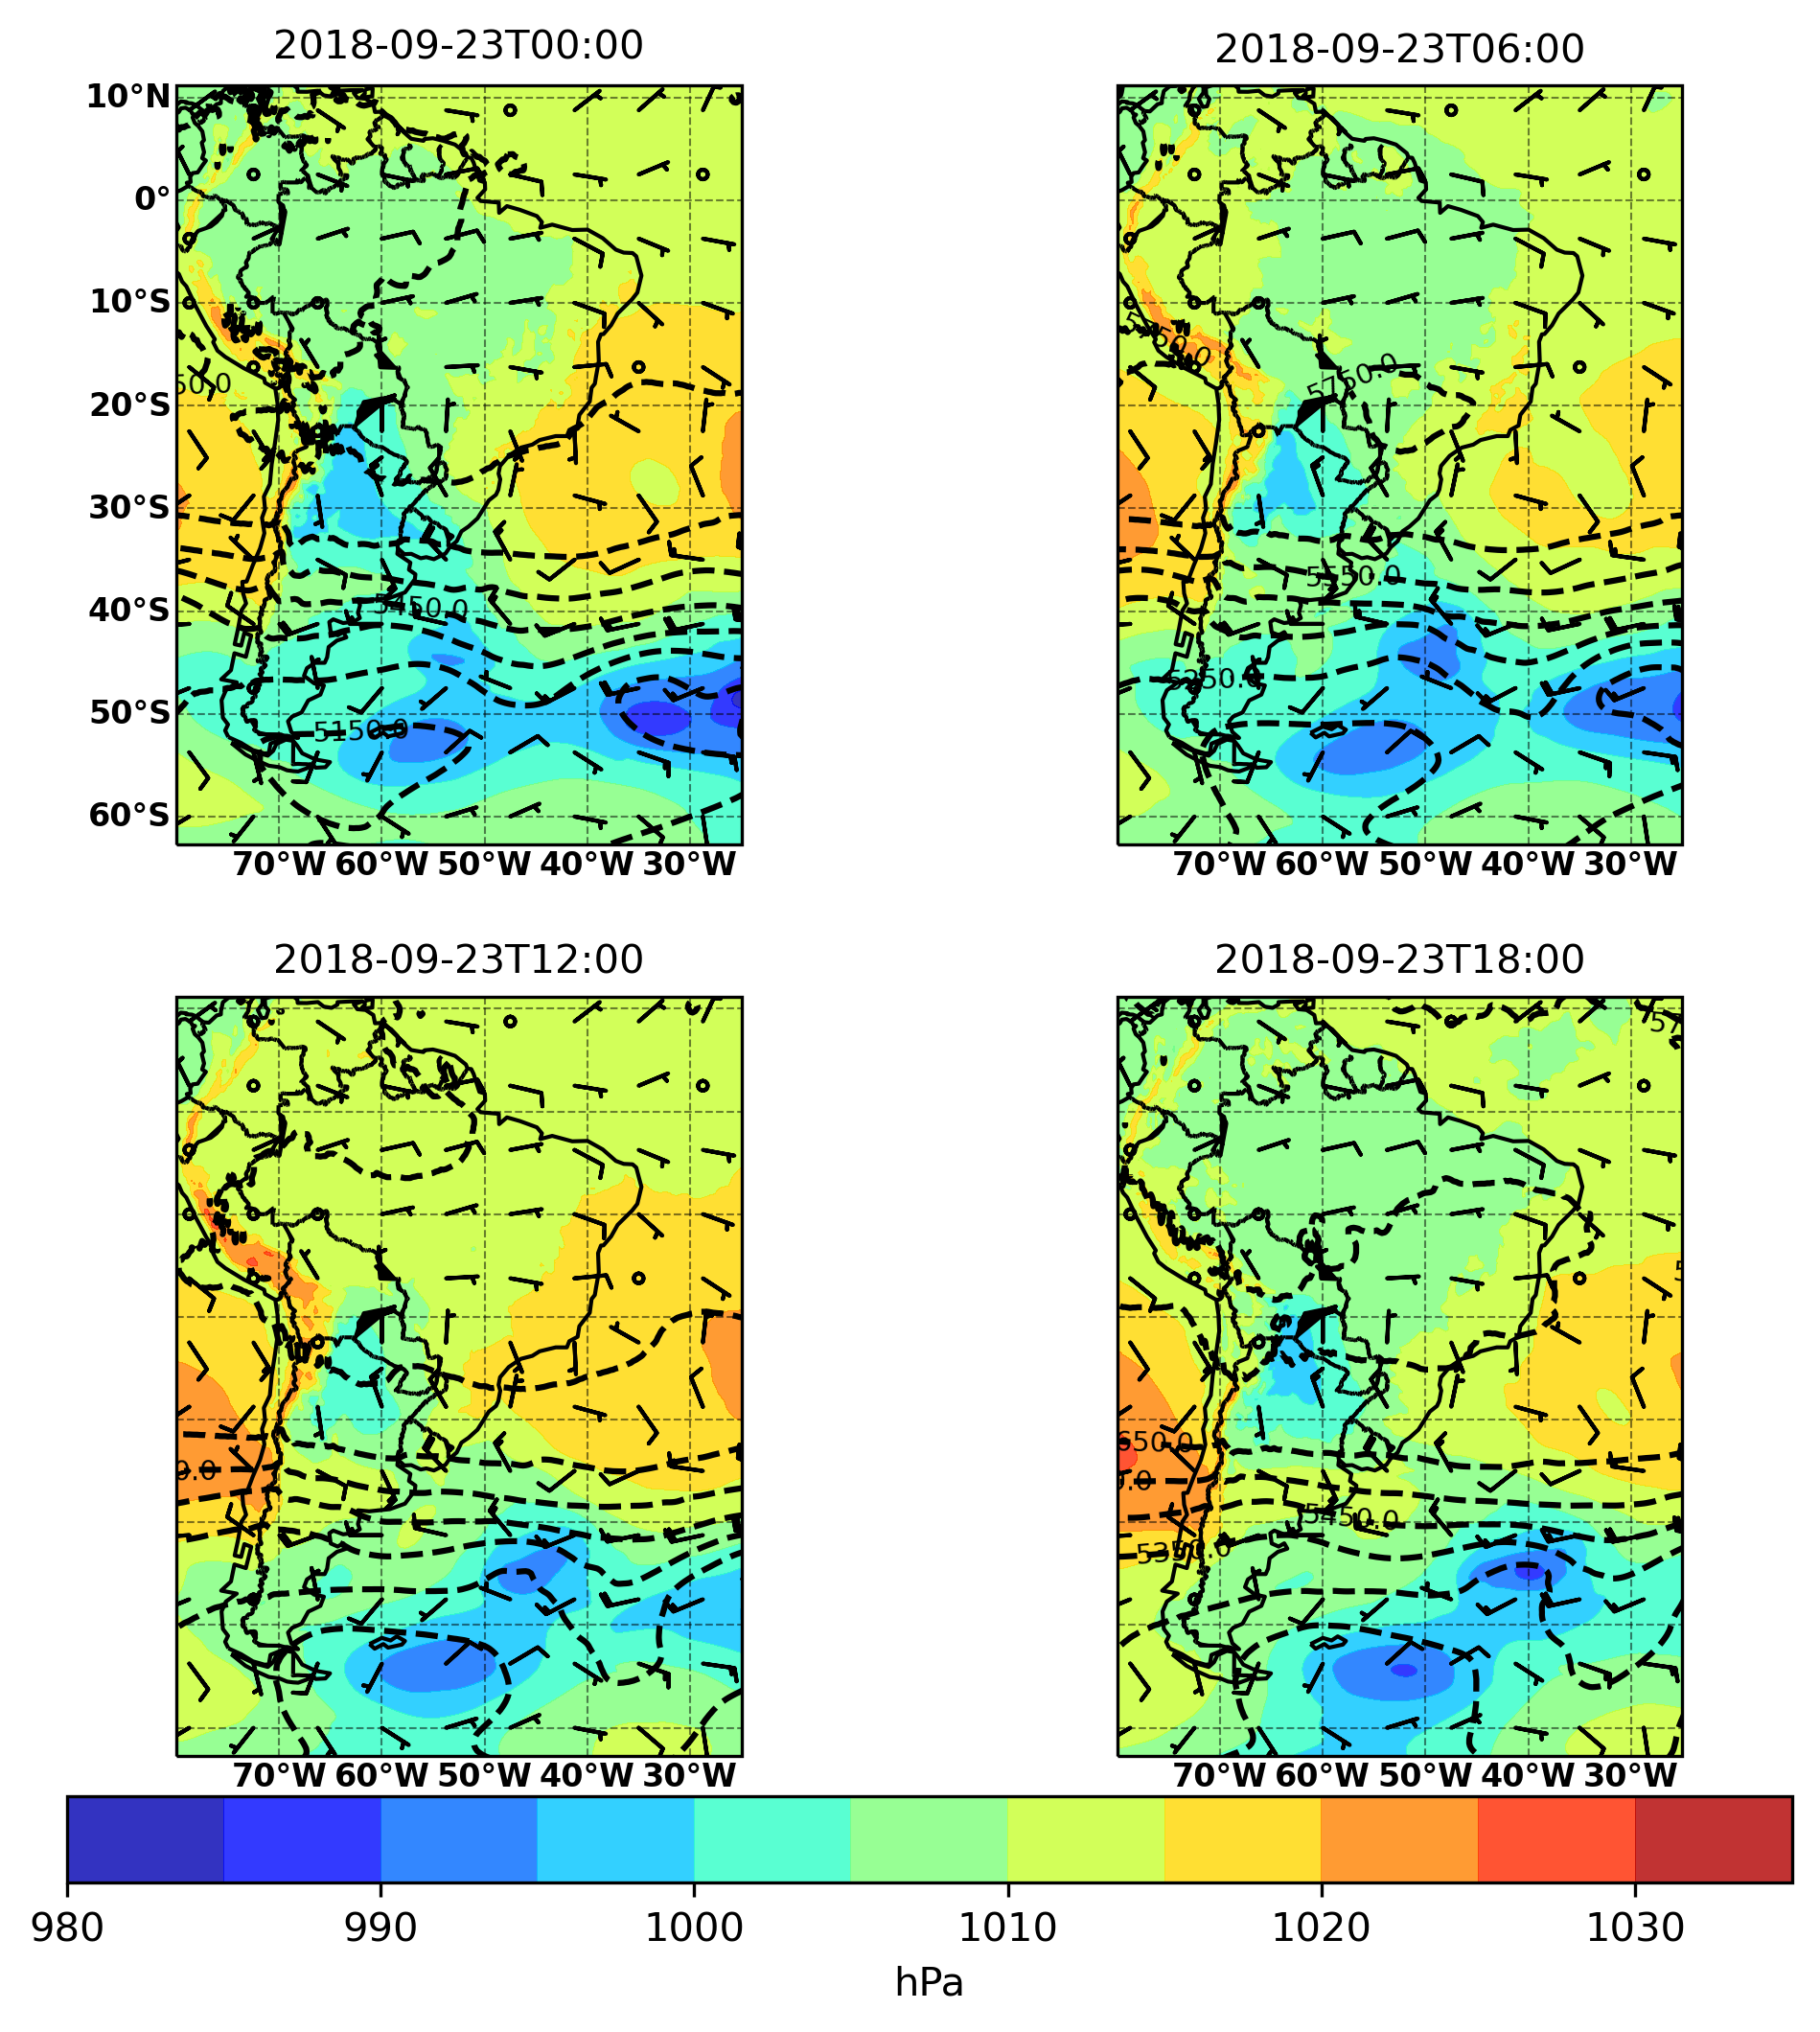

In [93]:
# CASO 2 - 1° DIA
i=0
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc")
d2 = d2.sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))
msl = d2['msl']
msl = msl * 10**(-2)

d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/pressure_levels.nc")
d = d.sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))
u=d['u'].sel(level=850)
v=d['v'].sel(level=850)

z = d['z'].sel(level=500) / 10
lon = d['longitude']
lat = d['latitude']
time = d['time']

n_plots = 4
j=0
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels_z = list(range(4650,5950,100))
levels_p = list(range(980,1040,5))

for i in range(1,n_plots+1):
    
    ax= plt.subplot(2, 2, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-80,-25,10,-60])
    cb = ax.contourf(lon,lat,msl[j,:,:], levels_p, cmap=get_cmap('jet'), alpha=0.8)
    cb2 = ax.contour(lon,lat,z[j,:,:], levels_z, colors='black',linestyles='--')
    lons,lats=np.meshgrid(lon,lat)
    ax.barbs(lons[::25,::25], lats[::25,::25], u.values[0,::25,::25], v.values[0,::25,::25], length=4,
                      transform=ccrs.PlateCarree(),
                      color='black', zorder=9)
    #barbs = ax.quiver(lons[::10,::10], lats[::10,::10], u.values[0,::10,::10], v.values[0,::10,::10]) #Plot every 50th 10m wind point in m/s

    plt.clabel(cb2,fmt='%1.1f', fontsize=7)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]), fontsize=10)
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.3, top=1.2, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='hPa', pad=0.02)
plt.savefig('msl_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

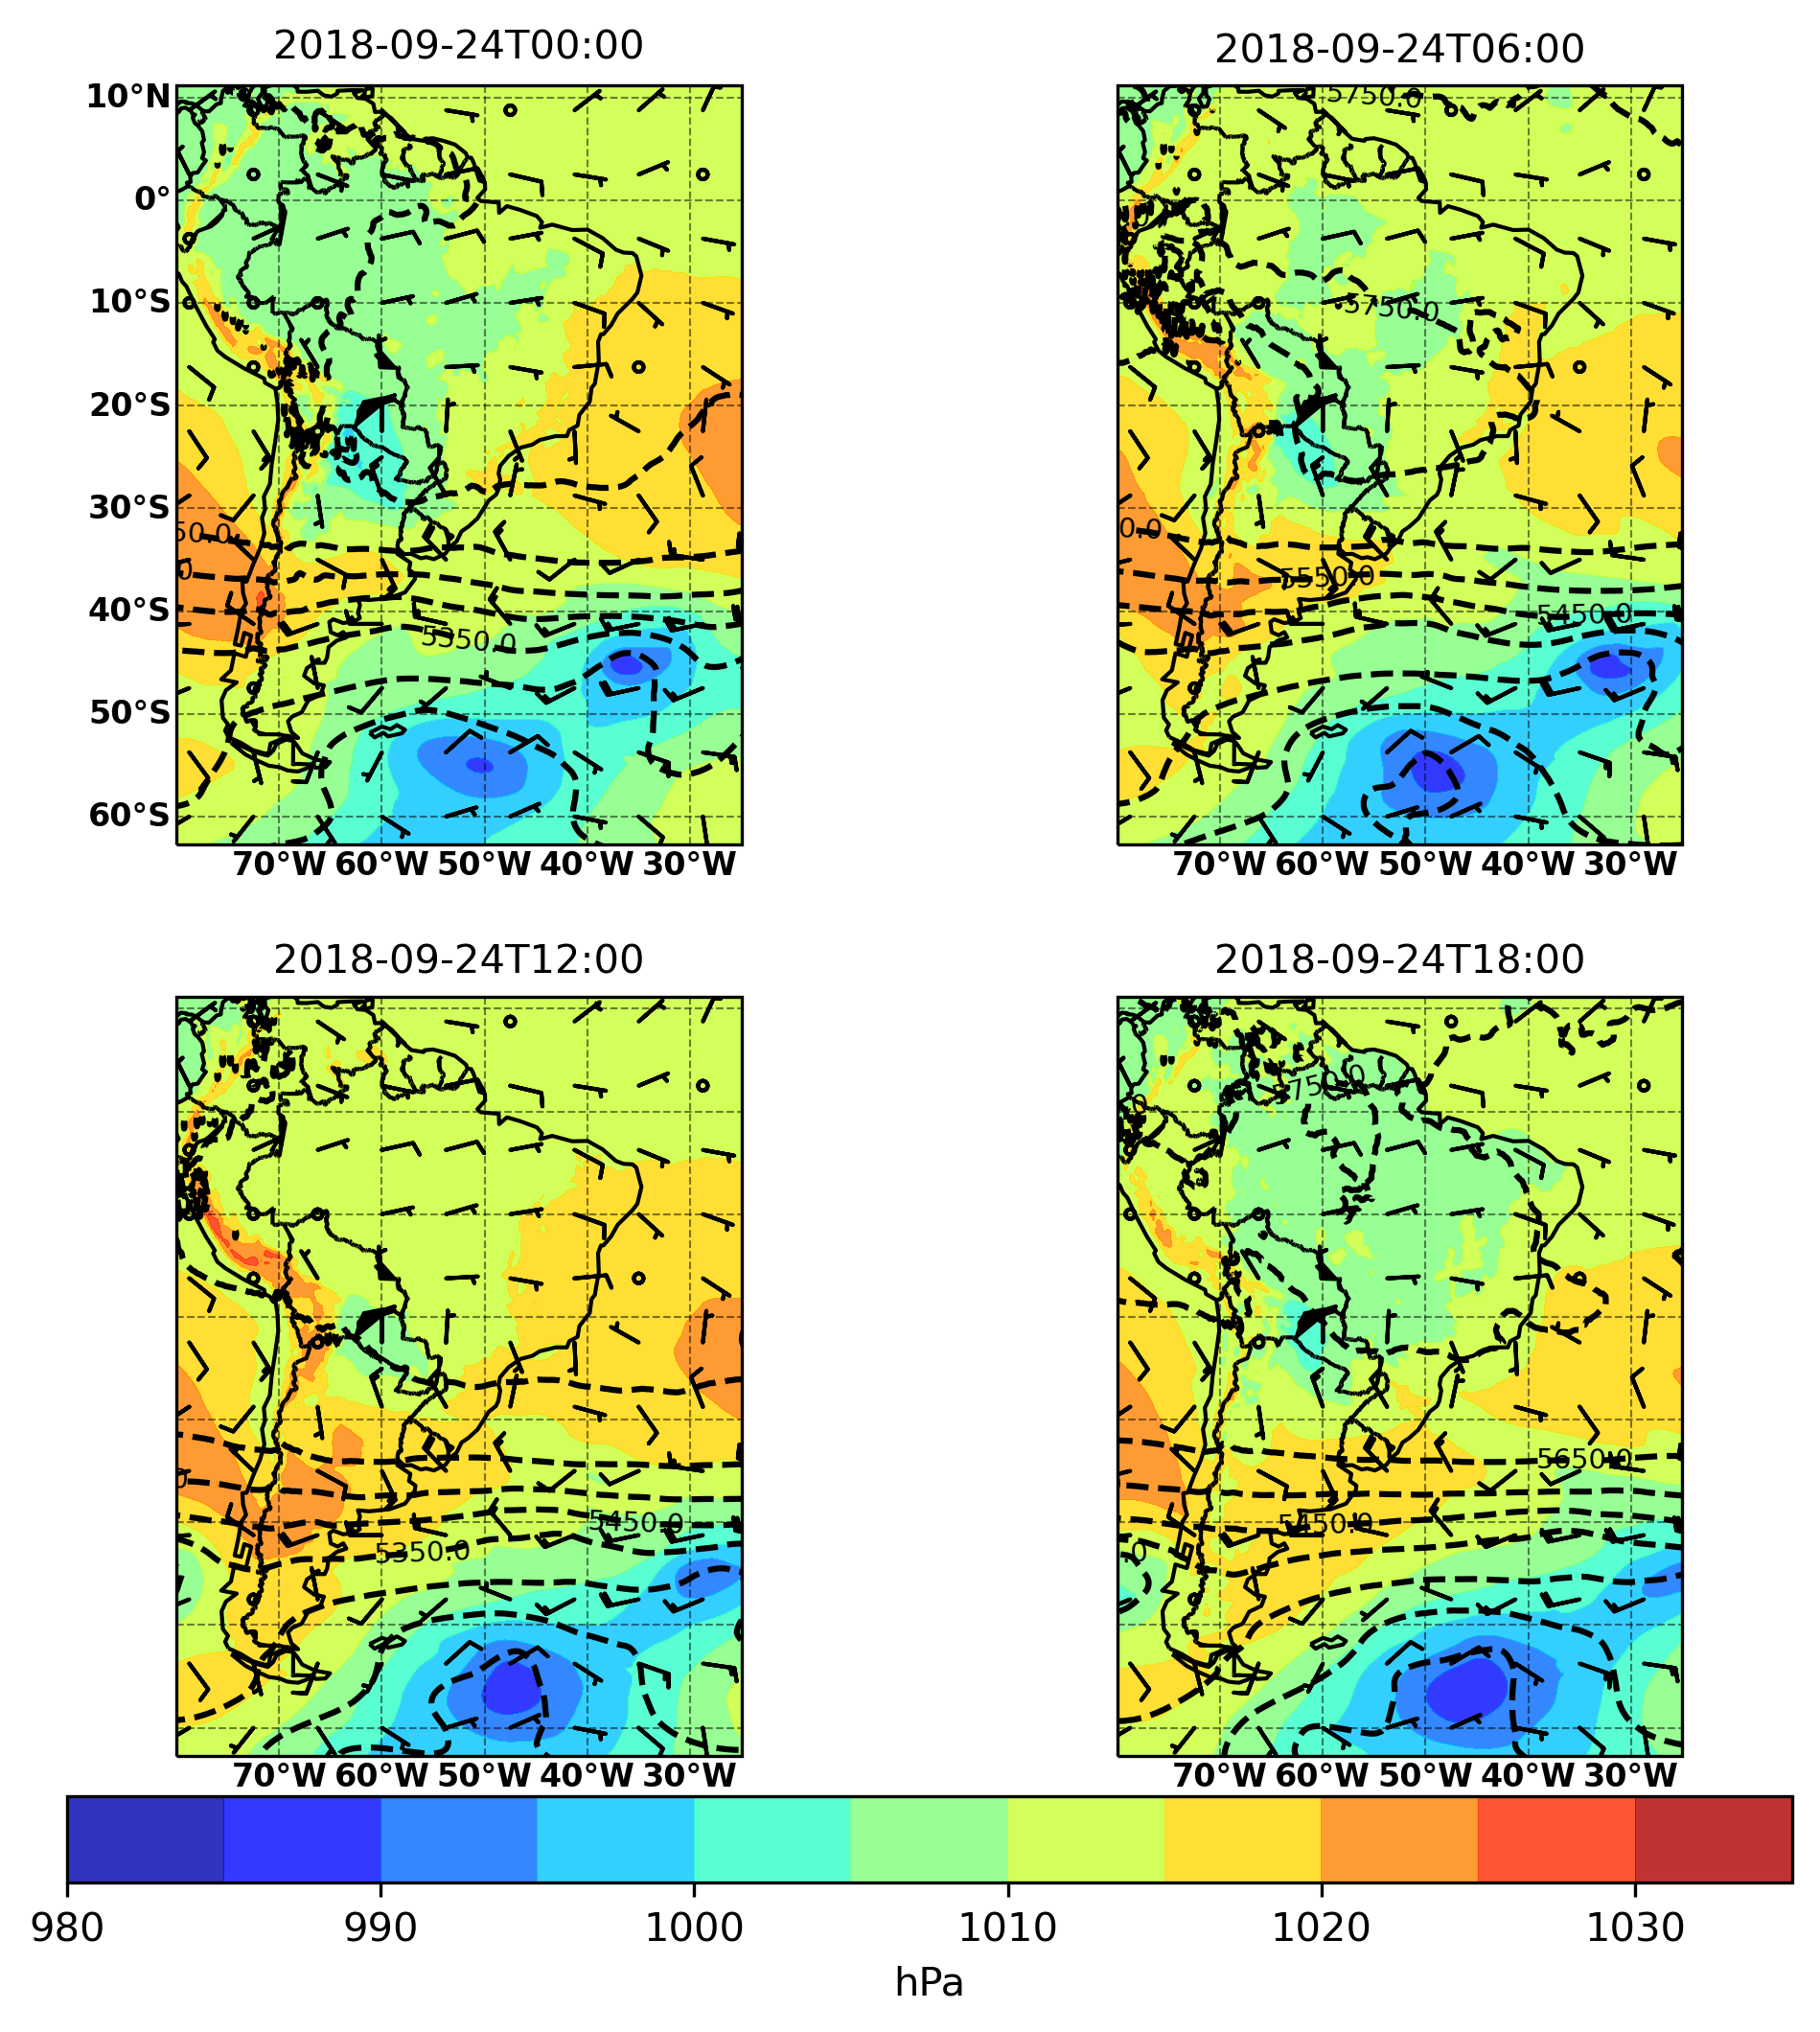

In [94]:
# CASO 2 - 2° DIA
i=5
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc")
d2 = d2.sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))
msl = d2['msl']
msl = msl * 10**(-2)

d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/pressure_levels.nc")
d = d.sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))
u=d['u'].sel(level=850)
v=d['v'].sel(level=850)

z = d['z'].sel(level=500) / 10
lon = d['longitude']
lat = d['latitude']
time = d['time']

n_plots = 4
j=24
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels_z = list(range(4650,5950,100))
levels_p = list(range(980,1040,5))

for i in range(1,n_plots+1):
    
    ax= plt.subplot(2, 2, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-80,-25,10,-60])
    cb = ax.contourf(lon,lat,msl[j,:,:], levels_p, cmap=get_cmap('jet'), alpha=0.8)
    cb2 = ax.contour(lon,lat,z[j,:,:], levels_z, colors='black',linestyles='--')
    lons,lats=np.meshgrid(lon,lat)
    ax.barbs(lons[::25,::25], lats[::25,::25], u.values[0,::25,::25], v.values[0,::25,::25], length=4,
                      transform=ccrs.PlateCarree(),
                      color='black', zorder=9)
    #barbs = ax.quiver(lons[::10,::10], lats[::10,::10], u.values[0,::10,::10], v.values[0,::10,::10]) #Plot every 50th 10m wind point in m/s

    plt.clabel(cb2,fmt='%1.1f', fontsize=7)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]), fontsize=10)
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.3, top=1.2, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='hPa', pad=0.02)
plt.savefig('msl_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [49]:
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/pressure_levels.nc")
d2 = d2.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00')).sel(level=850)
d2

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 49)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 850
  * time       (time) datetime64[ns] 2018-05-23 ... 2018-05-25
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    q          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    w          (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-04-19 01:06:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
# CASO 1 - 2° DIA
i=5
d2 = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/surface_level.nc")
d2 = d2.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
msl = d2['msl']
msl = msl * 10**(-2)

d = xr.open_dataset("/media/lucasdmarten/HD/DADOS_TCC/ERA5/dados_sinóticos/pressure_levels.nc")
d = d.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
z = d['z'].sel(level=500) / 10
lon = d['longitude']
lat = d['latitude']
time = d['time']

n_plots = 4
j=24
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels_z = list(range(4650,5950,100))
levels_p = list(range(980,1040,5))

for i in range(1,n_plots+1):
    
    ax= plt.subplot(2, 2, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-80,-25,10,-60])
    cb = ax.contourf(lon,lat,msl[j,:,:], levels_p, cmap=get_cmap('jet'), alpha=0.8)
    cb2 = ax.contour(lon,lat,z[j,:,:], levels_z, colors='black')
    barbs = ax.quiver(lons[::10,::10], lats[::10,::10], u.values[0,::10,::10], v.values[0,::10,::10]) #Plot every 50th 10m wind point in m/s

    plt.clabel(cb2,fmt='%1.1f', fontsize=7)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]), fontsize=10)
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.3, top=1.2, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='hPa', pad=0.02)
plt.savefig('msl_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [ ]:
d

In [ ]:
d = xr.open_dataset('./dados_sinóticos/surface_level.nc')
d = d.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
blh = d['t2m'] - 273.15
# blh = blh * 10**(-2)
lon = d['longitude']
lat = d['latitude']
time = d['time']
n_plots = 8
j=0
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels = list(range(-5,45,5))
for i in range(1,n_plots+1):
    
    ax= plt.subplot(4, 4, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-60,-45,-25,-36])
    cb = ax.contourf(lon,lat,blh[j,:,:],levels,cmap=get_cmap('jet'))
    cb2 = ax.contour(lon,lat,blh[j,:,:],levels, colors='black')
    plt.clabel(cb2,fmt='%1.1f')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]))
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.5, top=1.7, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='°C')
plt.savefig('t2m_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [ ]:
d = xr.open_dataset('./dados_sinóticos/surface_level.nc')
d = d.sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))
blh = d['t2m'] - 273.15
# blh = blh * 10**(-2)
lon = d['longitude']
lat = d['latitude']
time = d['time']
n_plots = 8
j=0
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels = list(range(-5,45,5))
for i in range(1,n_plots+1):
    
    ax= plt.subplot(4, 4, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-60,-45,-25,-36])
    cb = ax.contourf(lon,lat,blh[j,:,:],levels,cmap=get_cmap('jet'))
    cb2 = ax.contour(lon,lat,blh[j,:,:],levels, colors='black')
    plt.clabel(cb2,fmt='%1.1f')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]))
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.5, top=1.7, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='°C')
plt.savefig('t2m_caso2.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [ ]:
fig.

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = get_cmap('jet', 256)
newcolors = viridis(np.linspace(0, 1, 1000))


roxo = np.array([123/256, 104/256, 238/256, 1])
azul = np.array([0/256, 0/256, 255/256, 1])
ciano = np.array([0/256, 255/256, 255/256, 1])
verde = np.array([0/256, 128/256, 0/256, 1])
amarelo = np.array([255/256, 255/256, 0/256, 1])
vermelho = np.array([255/256, 0/256, 0/256, 1])



newcolors[:10, :] = roxo
newcolors[10:20, :] = azul
newcolors[20:30, :] = ciano
newcolors[30:40, :] = verde
newcolors[40:50, :] = amarelo
newcolors[50:, :] = vermelho

# newcolors[101:150, :] = ForestGreen

newcmp = ListedColormap(newcolors)
ForestGreen = np.array([34/256, 139/256, 34/256, 1])
Green = np.array([0/256, 128/256, 0/256, 1])
DarkGreen = np.array([0/256, 100/256, 0/256, 1])



colors = [ForestGreen,Green,DarkGreen]

In [ ]:
plt.figure?